In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def pre_poccess(dataset):
    
    ##adding indivdual where agency is not given
    dataset['agency'][dataset['agency'].isnull()] = 'Individual'
    dataset.drop(['agent'],axis=1, inplace=True)
    
    #using the conversion of urban https://www.zameen.com/forum/discussions/other_and_misc/kanal__marla__square_feet__square_yards_conversion-12358.html
    converted_area = []
    for area in dataset['area']:
        if area.endswith('Marla'):
            #print("MARLA", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 500)
        if area.endswith('Kanal'):
            #print("Kanal", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 25)
            
    #print(converted_area)
    dataset['area'] = converted_area
    
    dataset = dataset.drop(columns = ['page_url'])

    print("pre-poccessed successfully.")
    
    return dataset

In [24]:
data = pd.read_csv('dataset/Zameen Property Data.csv')
data = pre_poccess(data)
data.head(5)

C:\Users\Huda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


pre-poccessed successfully.


,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,2000.0,For Sale,2,02-04-2019,Individual
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,2800.0,For Sale,3,05-04-2019,Individual
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,4000.0,For Sale,5,07-17-2019,Individual
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,50.0,For Sale,4,04-05-2019,Individual
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,4000.0,For Sale,3,07-10-2019,Easy Property


In [25]:
data_null = data.isna().sum()
print(data_null)

property_id      0
location_id      0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
dtype: int64


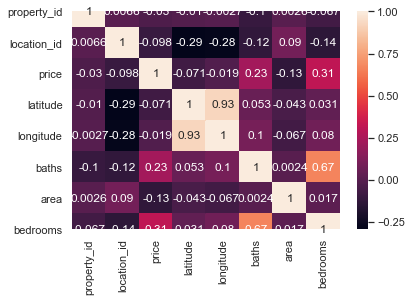

In [26]:
plt.figure()
sns.set(font_scale=1)
sns.heatmap(data.corr(),annot=True);

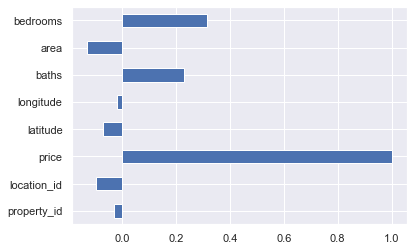

In [28]:
plt.figure()
data.corr()['price'].plot(kind='barh');

In [35]:
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
print('numerical: ',numer)
print('categorical: ',categ)

numerical:  {'longitude', 'latitude', 'bedrooms', 'property_id', 'price', 'area', 'baths', 'location_id'}
categorical:  ['province_name', 'agency', 'purpose', 'property_type', 'location', 'date_added', 'city']


Converting categorical data into a numerical: ecoding using factorize

In [38]:
data_targ = data.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]
data_targ.head(5)

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency
0,237062,3325,0,10000000,0,0,0,33.679890,73.012640,2,2000.0,0,2,0,0
1,346905,3236,0,6900000,1,0,0,33.700993,72.971492,3,2800.0,0,3,1,0
2,386513,764,1,16500000,2,0,0,33.631486,72.926559,6,4000.0,0,5,2,0
3,656161,340,1,43500000,3,0,0,33.707573,73.151199,4,50.0,0,4,3,0
4,841645,3226,1,7000000,4,0,0,33.492591,73.301339,3,4000.0,0,3,4,1


In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
data_targ.drop(['price'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)